In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("cardio_train.csv",sep=";",error_bad_lines=False,encoding="latin-1")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


#Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
print(f"Are there any missing values?: {data.isnull().sum().any()}")

Are there any missing values?: False


In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
display(data.describe())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,"70,000","70,000","70,000","70,000","70,000","70,000","70,000","70,000","70,000","70,000","70,000","70,000","70,000"
mean,"49,972","19,469",1,164,74,129,97,1,1,0,0,1,0
std,"28,851","2,467",0,8,14,154,188,1,1,0,0,0,1
min,0,"10,798",1,55,10,-150,-70,1,1,0,0,0,0
25%,"25,007","17,664",1,159,65,120,80,1,1,0,0,1,0
50%,"50,002","19,703",1,165,72,120,80,1,1,0,0,1,0
75%,"74,889","21,327",2,170,82,140,90,2,1,0,0,1,1
max,"99,999","23,713",2,250,200,"16,020","11,000",3,3,1,1,1,1


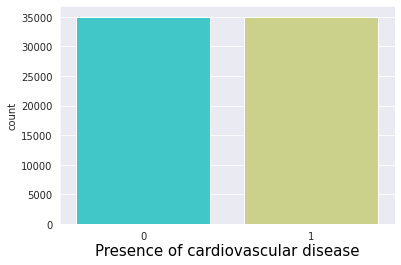

In [ ]:
sns.set_style('darkgrid')
sns.countplot(data.cardio,palette='rainbow')
plt.xlabel('Presence of cardiovascular disease',fontdict={'fontsize': 15,'color':'Black'},labelpad=2);

#Remove Outliers

In [ ]:
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?

In [ ]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [ ]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
display(data.describe())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,"60,142","60,142","60,142","60,142","60,142","60,142","60,142","60,142","60,142","60,142","60,142","60,142","60,142"
mean,"49,896","19,469",1,165,73,126,81,1,1,0,0,1,0
std,"28,840","2,461",0,7,12,14,8,1,1,0,0,0,0
min,0,"10,798",1,150,52,100,60,1,1,0,0,0,0
25%,"24,868","17,677",1,160,65,120,80,1,1,0,0,1,0
50%,"49,902","19,705",1,165,72,120,80,1,1,0,0,1,0
75%,"74,746","21,321",2,169,80,135,90,1,1,0,0,1,1
max,"99,999","23,713",2,180,106,163,100,3,3,1,1,1,1


#Data Transforming

In [ ]:
data['age'] = (data['age'] / 365).round().astype('int')
data.drop(['id'], axis='columns', inplace=True)

In [ ]:
data['age_bin'] = pd.cut(data['age'], [0,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 
                              labels=['0-20', '20-30', '30-35', '35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85','85-90','90-95','95-100'])

In [ ]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_bin
0,50,2,168,62,110,80,1,1,0,0,1,0,45-50
1,55,1,156,85,140,90,3,1,0,0,1,1,50-55
2,52,1,165,64,130,70,3,1,0,0,0,1,50-55
3,48,2,169,82,150,100,1,1,0,0,1,1,45-50
4,48,1,156,56,100,60,1,1,0,0,0,0,45-50


In [ ]:
data['bmi'] = data['weight']/((data['height']/100)**2)

In [ ]:
rating = []
for row in data['bmi']:
    if row < 18.5 :    rating.append(1) #UnderWeight
    elif row > 18.5 and row  < 24.9: rating.append(2) #NormalWeight
    elif row > 24.9 and row < 29.9:  rating.append(3) #OverWeight
    elif row > 29.9 and row < 34.9:  rating.append(4) #ClassObesity_1
    elif row > 34.9 and row < 39.9:  rating.append(5) #ClassObesity_2
    elif row > 39.9 and row < 49.9:  rating.append(6) #ClassObesity_3
    elif row > 49.9:  rating.append('Error')
        
    else:           rating.append('Not_Rated')

data['BMI_Class'] = rating

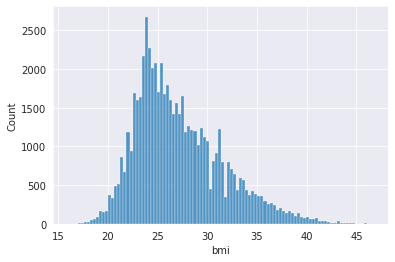

In [ ]:
sns.histplot(data = data, x = 'bmi', bins = 100)
plt.show()

In [ ]:
#Mean Arterial Pressure (MAP) = 2 Diastollic Blood Pressure + Sistolic Blood Pressure / 3
data['MAP'] = ((2* data['ap_lo']) + data['ap_hi']) / 3

In [ ]:
map_values = []
for row in data['MAP']:
    if row < 69.9:    map_values.append(1) #Low
    elif row > 70 and row  < 79.9:   map_values.append(2) #Normal
    elif row > 79.9 and row < 89.9:  map_values.append(3) #Normal
    elif row > 89.9 and row < 99.9:  map_values.append(4) #Normal
    elif row > 99.9 and row < 109.9:  map_values.append(5) #High
    elif row > 109.9 and row < 119.9:  map_values.append(6) #Normal
    elif row > 119.9:  map_values.append(7)
        
    else:           map_values.append('Not_Rated')

data['MAP_Class'] = map_values

In [ ]:
data.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_bin,bmi,BMI_Class,MAP,MAP_Class
0,50,2,168,62,110,80,1,1,0,0,1,0,45-50,22,2,90,4
1,55,1,156,85,140,90,3,1,0,0,1,1,50-55,35,5,107,5
2,52,1,165,64,130,70,3,1,0,0,0,1,50-55,24,2,90,4


#Prepare and Analize Data

In [ ]:
from sklearn import preprocessing

In [ ]:
categorical_data = data[["gender","cholesterol","gluc","smoke","active","cardio","age_bin","BMI_Class","MAP_Class"]]

In [ ]:
le = preprocessing.LabelEncoder()
categorical_data = categorical_data.apply(le.fit_transform)
categorical_data.head()

,gender,cholesterol,gluc,smoke,active,cardio,age_bin,BMI_Class,MAP_Class
0,1,0,0,0,1,0,3,1,2
1,0,2,0,0,1,1,4,4,3
2,0,2,0,0,0,1,4,1,2
3,1,0,0,0,1,1,3,2,4
4,0,0,0,0,0,0,3,1,0


In [ ]:
data_male = categorical_data.query("gender == 0")
data_female =categorical_data.query("gender == 1")
data_male.head()

,gender,cholesterol,gluc,smoke,active,cardio,age_bin,BMI_Class,MAP_Class
1,0,2,0,0,1,1,4,4,3
2,0,2,0,0,0,1,4,1,2
4,0,0,0,0,0,0,3,1,0
5,0,1,1,0,0,0,5,2,2
6,0,2,0,0,1,0,6,4,2


In [ ]:
data_female.head()

,gender,cholesterol,gluc,smoke,active,cardio,age_bin,BMI_Class,MAP_Class
0,1,0,0,0,1,0,3,1,2
3,1,0,0,0,1,1,3,2,4
7,1,2,2,0,1,1,6,3,3
11,1,0,0,0,1,0,4,1,2
12,1,0,0,0,0,0,2,1,2


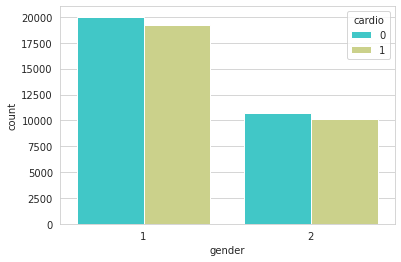

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data.gender,hue=data.cardio, palette='rainbow');

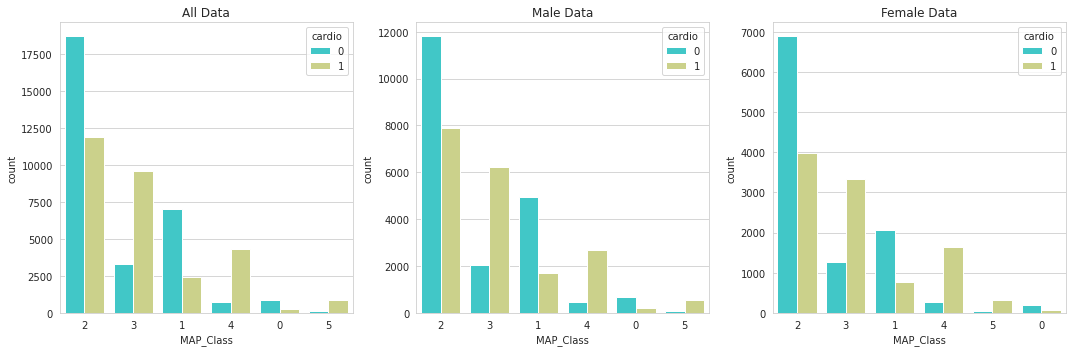

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=categorical_data['MAP_Class'],order=categorical_data['MAP_Class'].value_counts().index,hue=categorical_data['cardio'],ax=axs[0],palette='rainbow')
sns.countplot(x=data_male['MAP_Class'],order=data_male['MAP_Class'].value_counts().index,hue=data_male['cardio'],ax=axs[1],palette='rainbow')
sns.countplot(x=data_female['MAP_Class'],order=data_female['MAP_Class'].value_counts().index,hue=data_female['cardio'],ax=axs[2],palette='rainbow')

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

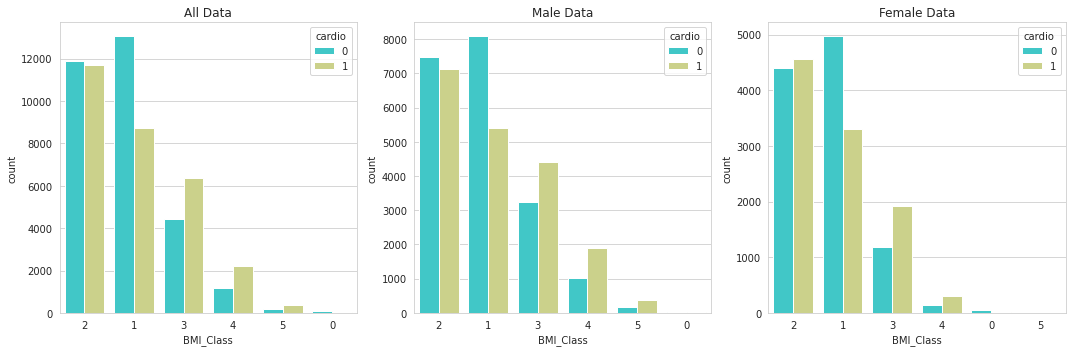

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=categorical_data['BMI_Class'],order=categorical_data['BMI_Class'].value_counts().index,hue=categorical_data['cardio'],ax=axs[0],palette='rainbow')
sns.countplot(x=data_male['BMI_Class'],order=data_male['BMI_Class'].value_counts().index,hue=data_male['cardio'],ax=axs[1],palette='rainbow')
sns.countplot(x=data_female['BMI_Class'],order=data_female['BMI_Class'].value_counts().index,hue=data_female['cardio'],ax=axs[2],palette='rainbow')

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

#KModes Analysis

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


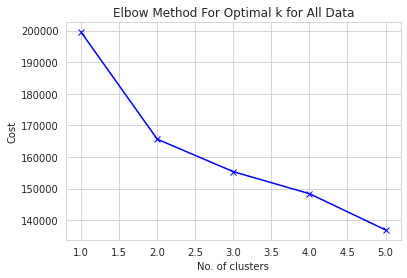

In [ ]:
# Elbow curve to find optimal K in Huang init for All Data
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(categorical_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k for All Data')
plt.show()

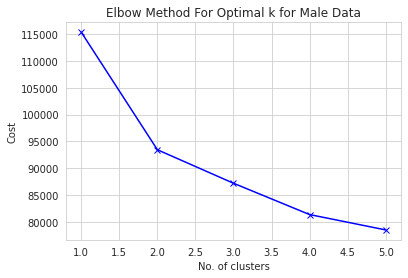

In [ ]:
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(data_male)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k for Male Data')
plt.show()

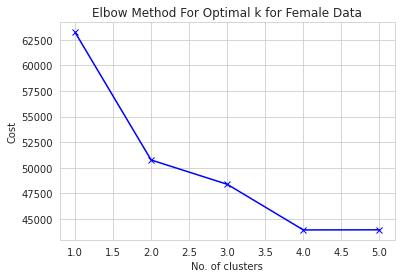

In [ ]:
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 5, verbose=0)
    kmode.fit_predict(data_female)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k for Female Data')
plt.show()

In [ ]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)
clusters_huang_1 = km_huang.fit_predict(data_female)
clusters_huang_2 = km_huang.fit_predict(data_male)

In [ ]:
data_female.insert(0,"Cluster", clusters_huang_1, True)
data_female.head()

,Cluster,gender,cholesterol,gluc,smoke,active,cardio,age_bin,BMI_Class,MAP_Class
0,0,1,0,0,0,1,0,3,1,2
3,1,1,0,0,0,1,1,3,2,4
7,1,1,2,2,0,1,1,6,3,3
11,0,1,0,0,0,1,0,4,1,2
12,0,1,0,0,0,0,0,2,1,2


In [ ]:
data_male.insert(0, "Cluster", clusters_huang_2, True)
data_male["Cluster"].replace({0:2, 1:3}, inplace=True)
data_male.head()

,Cluster,gender,cholesterol,gluc,smoke,active,cardio,age_bin,BMI_Class,MAP_Class
1,2,0,2,0,0,1,1,4,4,3
2,3,0,2,0,0,0,1,4,1,2
4,3,0,0,0,0,0,0,3,1,0
5,2,0,1,1,0,0,0,5,2,2
6,3,0,2,0,0,1,0,6,4,2


In [ ]:
data_clusters = pd.concat([data_female, data_male], ignore_index=True, sort=False)
data_clusters.head(5)

,Cluster,gender,cholesterol,gluc,smoke,active,cardio,age_bin,BMI_Class,MAP_Class
0,0,1,0,0,0,1,0,3,1,2
1,1,1,0,0,0,1,1,3,2,4
2,1,1,2,2,0,1,1,6,3,3
3,0,1,0,0,0,1,0,4,1,2
4,0,1,0,0,0,0,0,2,1,2


#Classification


In [ ]:
data_ml = data_clusters.apply(le.fit_transform)
data_ml.describe()

,Cluster,gender,cholesterol,gluc,smoke,active,cardio,age_bin,BMI_Class,MAP_Class
count,"60,142","60,142","60,142","60,142","60,142","60,142","60,142","60,142","60,142","60,142"
mean,2,0,0,0,0,1,0,4,2,2
std,1,0,1,1,0,0,0,1,1,1
min,0,0,0,0,0,0,0,0,0,0
25%,1,0,0,0,0,1,0,3,1,2
50%,2,0,0,0,0,1,0,4,2,2
75%,3,1,0,0,0,1,1,5,2,3
max,3,1,2,2,1,1,1,6,5,5


In [ ]:
import pandas_profiling as pp
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
data_target = data_clusters['cardio']
data = data_clusters.drop(['cardio'], axis=1)
#separate into 30/70%
train, test, target, target_test = train_test_split(data, data_target, test_size=0.3, random_state=0)
#split training set to validation set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train, target, test_size=0.3, random_state=0)

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6450
           1       0.77      0.62      0.69      6180

    accuracy                           0.72     12630
   macro avg       0.73      0.72      0.72     12630
weighted avg       0.73      0.72      0.72     12630



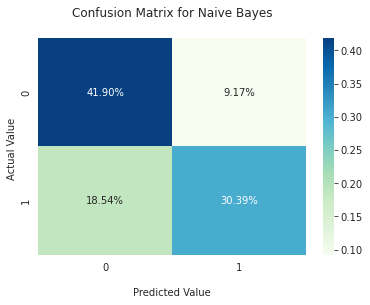

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(train, target)
Ypred_gnb = gaussian.predict(Xtest)
cf_matrix = confusion_matrix(Ytest, Ypred_gnb)
acc_test_gaussian = round(gaussian.score(Xtest, Ytest) * 100, 2)
print(classification_report(Ytest, Ypred_gnb))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='GnBu')
ax.set_title('Confusion Matrix for Naive Bayes\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      6450
           1       0.89      0.82      0.85      6180

    accuracy                           0.86     12630
   macro avg       0.86      0.86      0.86     12630
weighted avg       0.86      0.86      0.86     12630



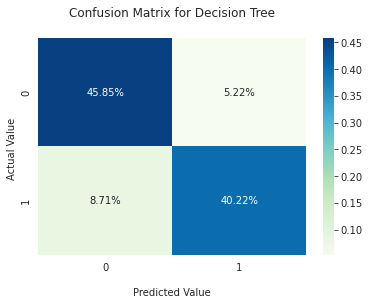

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
Ypred_dt = decision_tree.predict(Xtest)
cf_matrix = confusion_matrix(Ytest, Ypred_dt)
acc_test_decision_tree = round(decision_tree.score(Xtest, Ytest) * 100, 2)
print(classification_report(Ytest, Ypred_dt))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='GnBu')
ax.set_title('Confusion Matrix for Decision Tree\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      6450
           1       0.88      0.83      0.85      6180

    accuracy                           0.86     12630
   macro avg       0.86      0.86      0.86     12630
weighted avg       0.86      0.86      0.86     12630



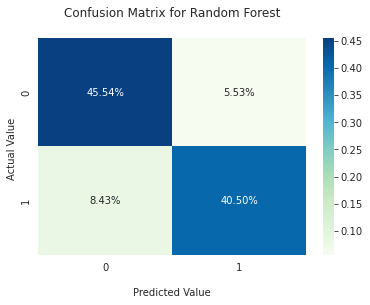

In [ ]:
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5)
random_forest.fit(train, target)
Ypred_rf = random_forest.predict(Xtest)
cf_matrix = confusion_matrix(Ytest, Ypred_rf)
acc_test_random_forest = round(random_forest.score(Xtest, Ytest) * 100, 2)
print(classification_report(Ytest, Ypred_rf))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='GnBu')
ax.set_title('Confusion Matrix for Random Forest\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6450
           1       0.83      0.84      0.84      6180

    accuracy                           0.84     12630
   macro avg       0.84      0.84      0.84     12630
weighted avg       0.84      0.84      0.84     12630



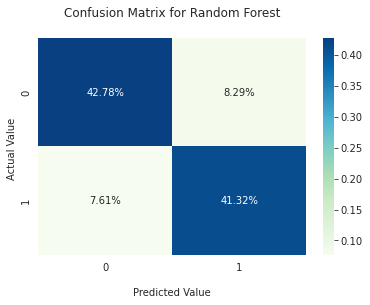

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(train, target)
Ypred_gb= gb_clf.predict(Xtest)
cf_matrix = confusion_matrix(Ytest, Ypred_gb)
acc_test_gradient = round(gb_clf.score(Xtest, Ytest) * 100, 2)
print(classification_report(Ytest, Ypred_gb))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='GnBu')
ax.set_title('Confusion Matrix for Random Forest\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6450
           1       0.84      0.83      0.84      6180

    accuracy                           0.84     12630
   macro avg       0.84      0.84      0.84     12630
weighted avg       0.84      0.84      0.84     12630



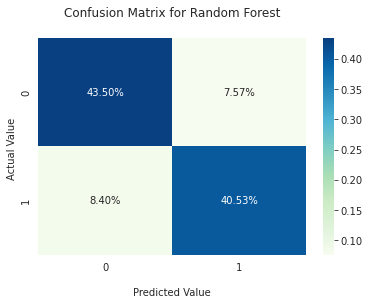

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(train, target)
Ypred_xgb= xgb_clf.predict(Xtest)
cf_matrix = confusion_matrix(Ytest, Ypred_xgb)
acc_test_xgb= round(xgb_clf.score(Xtest, Ytest) * 100, 2)
print(classification_report(Ytest, Ypred_xgb))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='GnBu')
ax.set_title('Confusion Matrix for Random Forest\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      6450
           1       0.82      0.80      0.81      6180

    accuracy                           0.82     12630
   macro avg       0.82      0.82      0.82     12630
weighted avg       0.82      0.82      0.82     12630



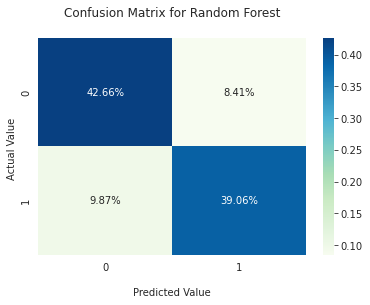

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(train, target)
Ypred_svm= svm.predict(Xtest)
cf_matrix = confusion_matrix(Ytest, Ypred_svm)
acc_test_svm= round(svm.score(Xtest, Ytest) * 100, 2)
print(classification_report(Ytest, Ypred_svm))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='GnBu')
ax.set_title('Confusion Matrix for Random Forest\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6450
           1       0.72      0.68      0.70      6180

    accuracy                           0.72     12630
   macro avg       0.72      0.72      0.72     12630
weighted avg       0.72      0.72      0.72     12630



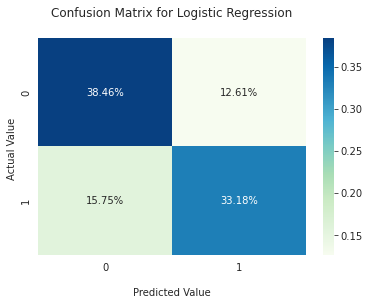

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train, target)
Ypred_lr = lr.predict(Xtest)
cf_matrix = confusion_matrix(Ytest, Ypred_lr)
acc_test_logistic= round(lr.score(Xtest, Ytest) * 100, 2)
print(classification_report(Ytest, Ypred_lr))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='GnBu')
ax.set_title('Confusion Matrix for Logistic Regression\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');
plt.show()

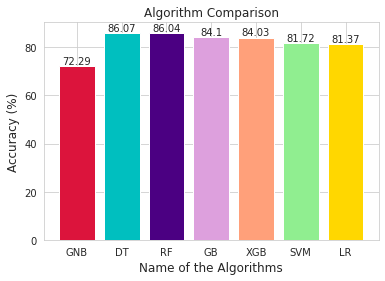

In [ ]:
clf = np.array(["GNB", "DT", "RF", "GB", "XGB", "SVM", "LR"])
acc_scores = np.array([acc_test_gaussian, acc_test_decision_tree, acc_test_random_forest, acc_test_gradient, acc_test_xgb, acc_test_svm, acc_test_logistic])
colors_list = ['crimson','c', 'indigo', 'plum', 'lightsalmon', 'lightgreen', 'gold']

plt.xlabel('Name of the Algorithms', fontsize=12)
plt.title('Algorithm Comparison', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
pb = plt.bar(clf, acc_scores, color = colors_list)
for i in range(len(clf)):
    plt.text(i, acc_scores[i], acc_scores[i], ha = "center", va = "bottom", fontsize = 10)
plt.show()

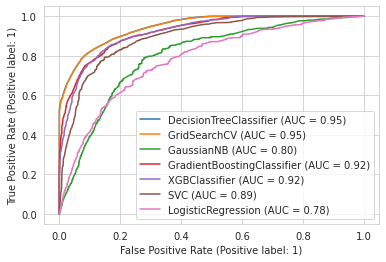

In [ ]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(decision_tree, Xtest, Ytest)
plot_roc_curve(random_forest,Xtest, Ytest, ax = disp.ax_)
plot_roc_curve(gaussian,Xtest, Ytest, ax = disp.ax_)
plot_roc_curve(gb_clf,Xtest, Ytest, ax = disp.ax_)
plot_roc_curve(xgb_clf,Xtest, Ytest, ax = disp.ax_)
plot_roc_curve(svm,Xtest, Ytest, ax = disp.ax_)
plot_roc_curve(lr,Xtest, Ytest, ax = disp.ax_)